### Bike Sharing Data Analysis
#### Build a regression model for the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Objective is to find out 
- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demands

<br><br><br>

## Step 1: Reading and Understanding the Data

Let us first import libraries and read the dataset

In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("day.csv")

In [4]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Visualising the Data
Let us analyse the numeric variables by plotting the scatter chart (pair plotting) between them

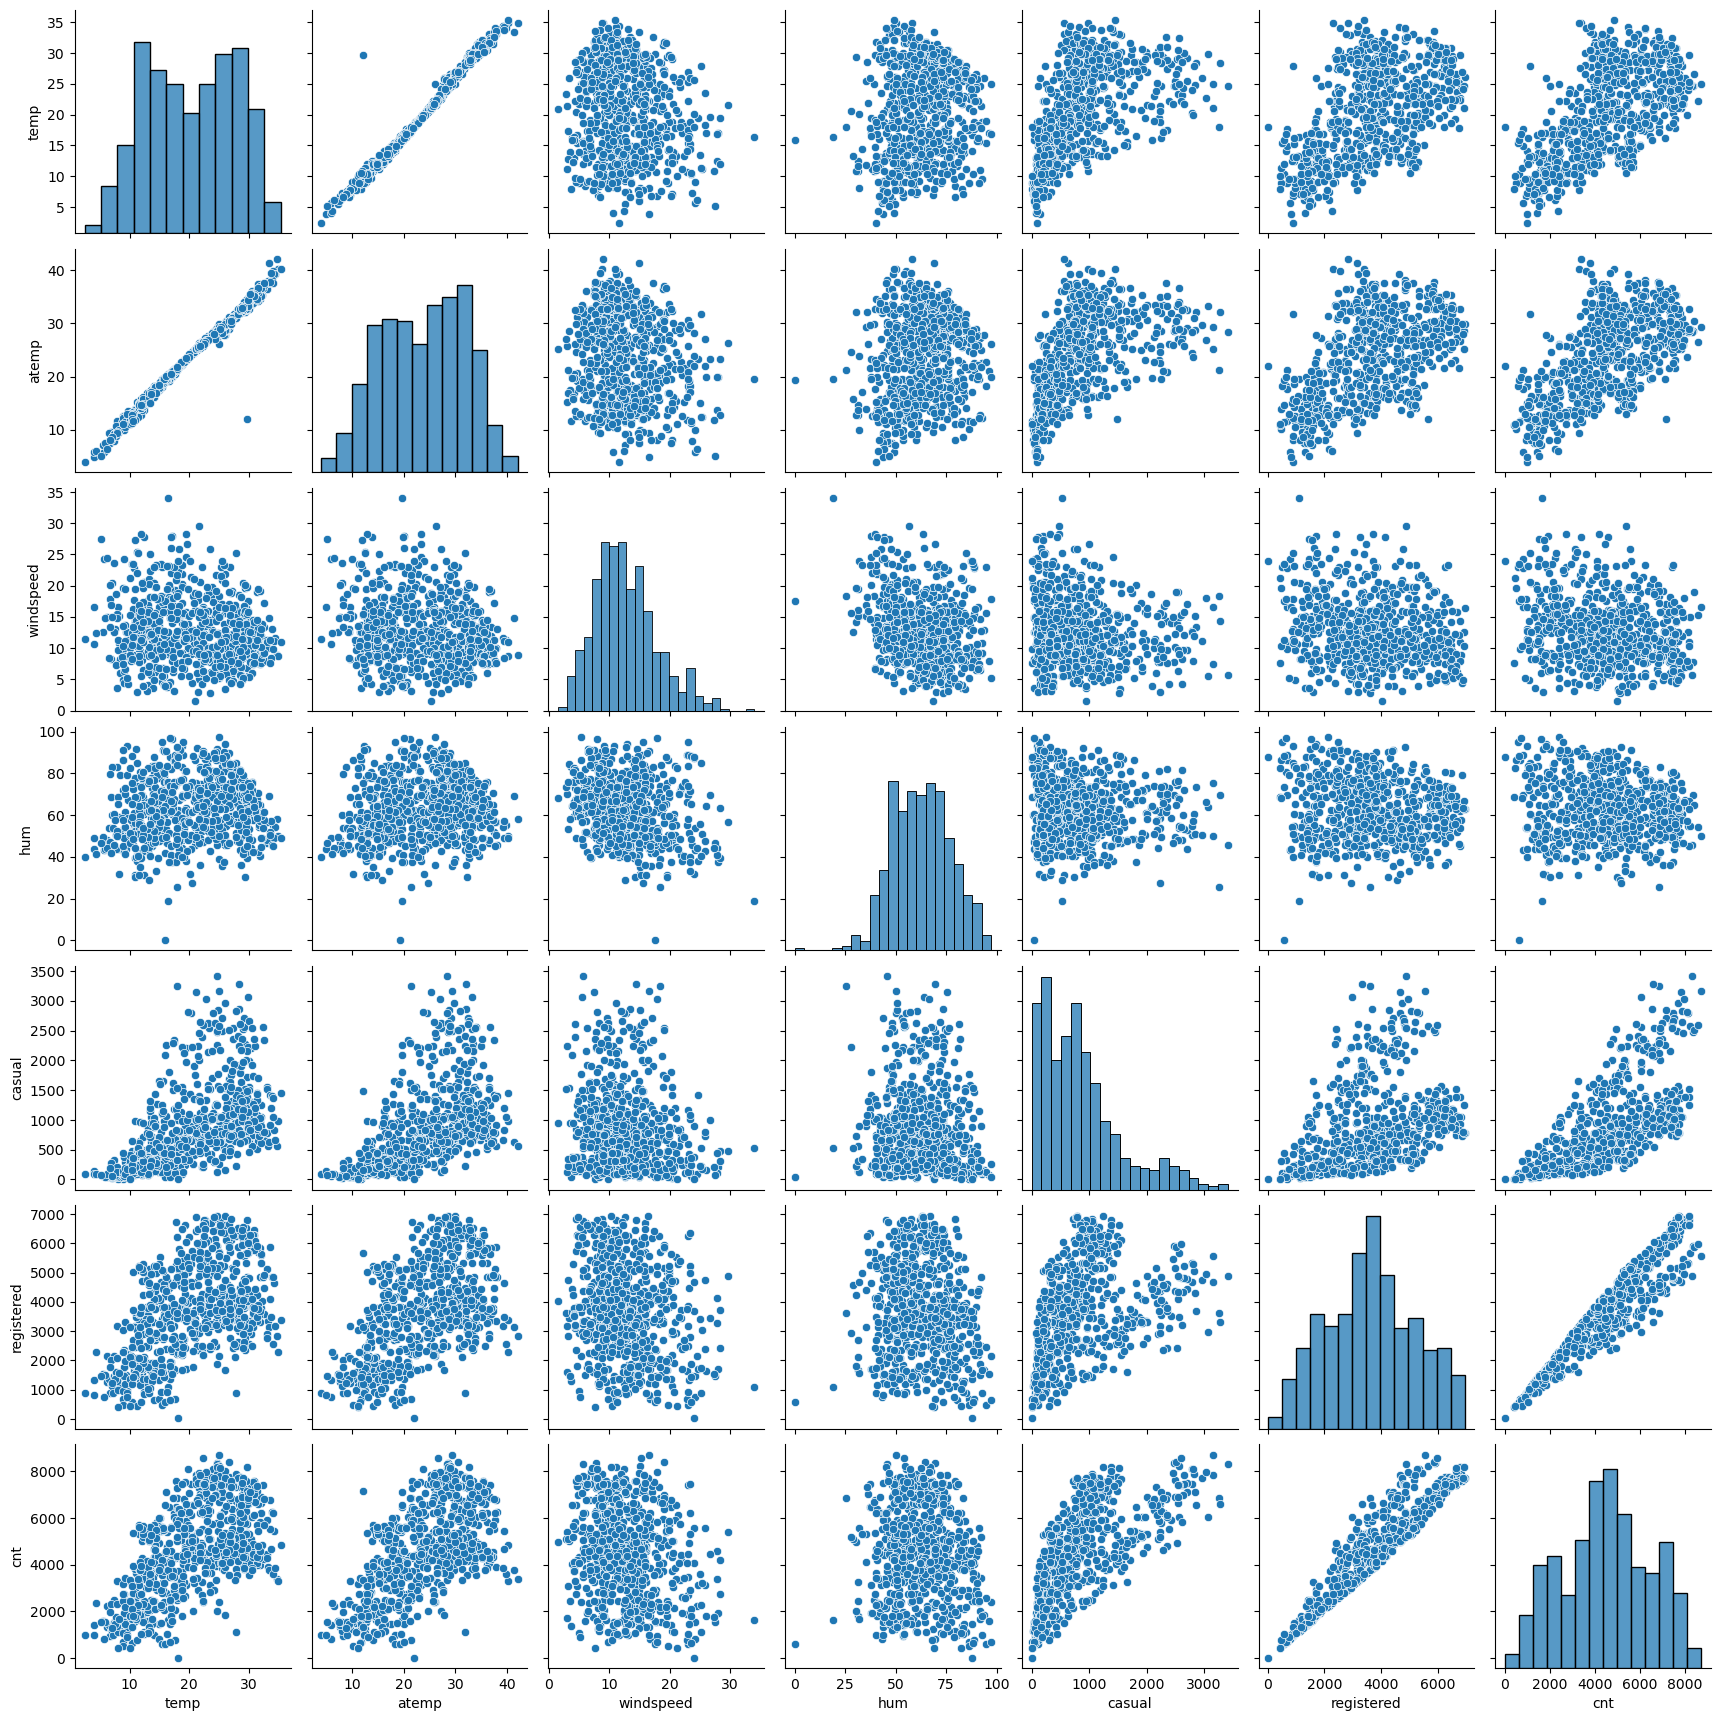

In [7]:
### pair plot numerical variables
numeric_vars = [ "temp", "atemp", "windspeed", "hum", "casual", "registered", "cnt"]
sns.pairplot(data[numeric_vars])

#### Visualising Categorical Variables
Let's make a boxplot for some of these variables.

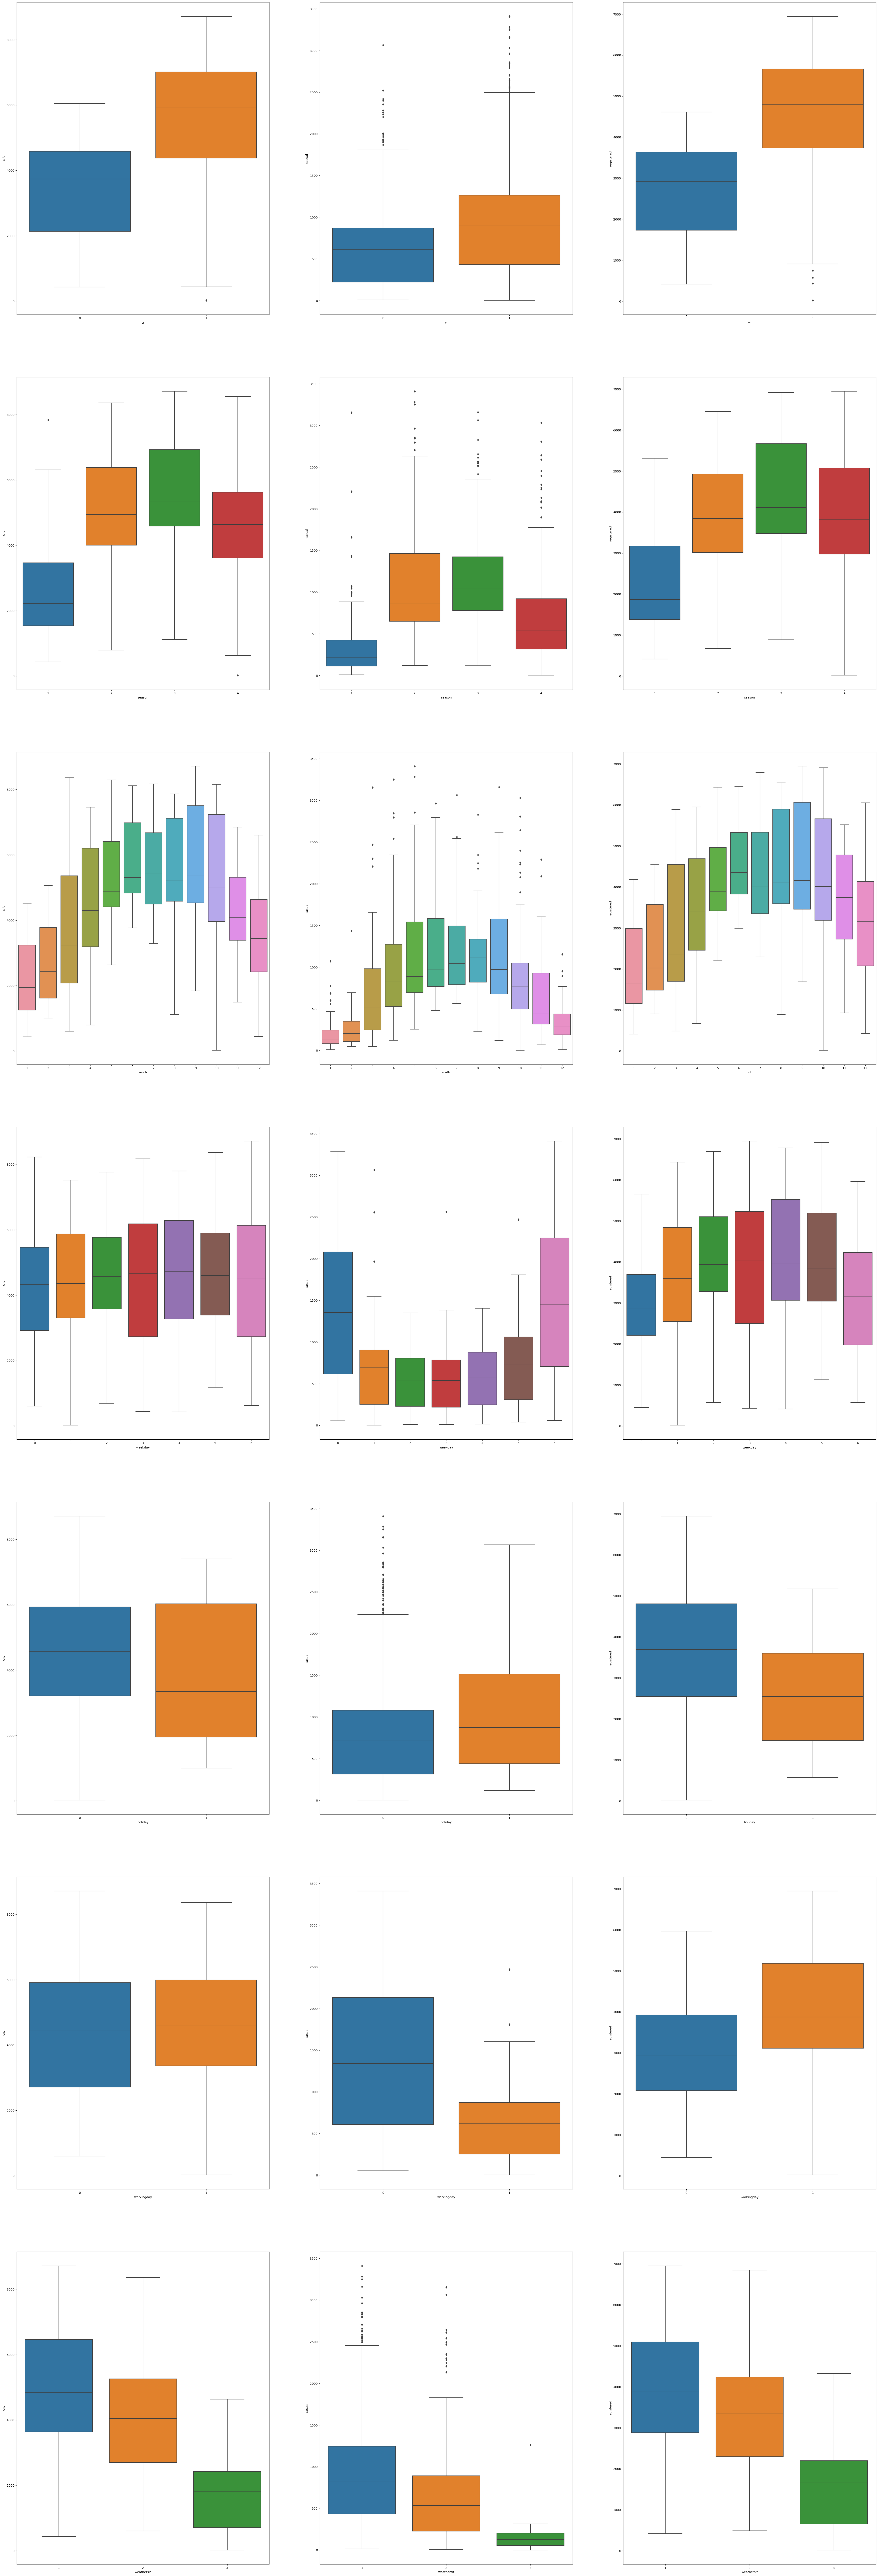

In [8]:


plt.figure(figsize=(50, 150))
plt.subplot(7,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(7,3,2)
sns.boxplot(x = 'yr', y = 'casual', data = data)
plt.subplot(7,3,3)
sns.boxplot(x = 'yr', y = 'registered', data = data)

plt.subplot(7,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(7,3,5)
sns.boxplot(x = 'season', y = 'casual', data = data)
plt.subplot(7,3,6)
sns.boxplot(x = 'season', y = 'registered', data = data)

plt.subplot(7,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(7,3,8)
sns.boxplot(x = 'mnth', y = 'casual', data = data)
plt.subplot(7,3,9)
sns.boxplot(x = 'mnth', y = 'registered', data = data)

plt.subplot(7,3,10)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(7,3,11)
sns.boxplot(x = 'weekday', y = 'casual', data = data)
plt.subplot(7,3,12)
sns.boxplot(x = 'weekday', y = 'registered', data = data)

plt.subplot(7,3,13)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(7,3,14)
sns.boxplot(x = 'holiday', y = 'casual', data = data)
plt.subplot(7,3,15)
sns.boxplot(x = 'holiday', y = 'registered', data = data)

plt.subplot(7,3,16)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(7,3,17)
sns.boxplot(x = 'workingday', y = 'casual', data = data)
plt.subplot(7,3,18)
sns.boxplot(x = 'workingday', y = 'registered', data = data)

plt.subplot(7,3,19)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(7,3,20)
sns.boxplot(x = 'weathersit', y = 'casual', data = data)
plt.subplot(7,3,21)
sns.boxplot(x = 'weathersit', y = 'registered', data = data)
plt.show()

In [9]:
data["mnth"].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [10]:
data["season"].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [11]:
data["weekday"].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

##  Create Dummy variables for "month", "season" and "weekday" variables


In [12]:
dummies = pd.get_dummies(data["mnth"], prefix="month_", dtype='int')

In [13]:
dummies.head()

,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
data = pd.concat([data, dummies], axis=1)

In [15]:
dummies = pd.get_dummies(data["season"], prefix="season_", dtype='int')

In [16]:
data = pd.concat([data, dummies], axis=1)

In [17]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,month__7,month__8,month__9,month__10,month__11,month__12,season__1,season__2,season__3,season__4
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,1,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,0,0,1,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,1,0,0,0


In [18]:
dummies = pd.get_dummies(data["weekday"], prefix="weekday_", dtype='int')

In [19]:
data = pd.concat([data, dummies], axis=1)

In [20]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,season__2,season__3,season__4,weekday__0,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,0,0,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,1,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,1,0,0,0


### Drop variables ["mnth", "season", "weekday"] as dummies are created for these

In [21]:
data.drop(columns=["mnth", "season", "weekday"], inplace=True)

In [22]:
data.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'month__1', 'month__2', 'month__3', 'month__4', 'month__5', 'month__6',
       'month__7', 'month__8', 'month__9', 'month__10', 'month__11',
       'month__12', 'season__1', 'season__2', 'season__3', 'season__4',
       'weekday__0', 'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4',
       'weekday__5', 'weekday__6'],
      dtype='object')

## Splitting the Data into Training and Testing Sets



In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
dataTrain, dataTest = train_test_split(data, train_size=0.7, random_state=100)

In [25]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     510 non-null    int64  
 1   dteday      510 non-null    object 
 2   yr          510 non-null    int64  
 3   holiday     510 non-null    int64  
 4   workingday  510 non-null    int64  
 5   weathersit  510 non-null    int64  
 6   temp        510 non-null    float64
 7   atemp       510 non-null    float64
 8   hum         510 non-null    float64
 9   windspeed   510 non-null    float64
 10  casual      510 non-null    int64  
 11  registered  510 non-null    int64  
 12  cnt         510 non-null    int64  
 13  month__1    510 non-null    int64  
 14  month__2    510 non-null    int64  
 15  month__3    510 non-null    int64  
 16  month__4    510 non-null    int64  
 17  month__5    510 non-null    int64  
 18  month__6    510 non-null    int64  
 19  month__7    510 non-null    int6

### Rescaling the Features 

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', "cnt"]

dataTrain[num_vars] = scaler.fit_transform(dataTrain[num_vars])

In [29]:
dataTrain.head()

,instant,dteday,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,...,season__2,season__3,season__4,weekday__0,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
576,577,31-07-2019,1,0,1,1,0.815169,0.766351,0.725633,0.264686,...,0,1,0,0,0,1,0,0,0,0
426,427,03-03-2019,1,0,0,2,0.442393,0.438975,0.640189,0.255342,...,0,0,0,0,0,0,0,0,0,1
728,729,30-12-2019,1,0,0,1,0.245101,0.200348,0.498067,0.663106,...,0,0,0,1,0,0,0,0,0,0
482,483,28-04-2019,1,0,0,2,0.395666,0.391735,0.504508,0.188475,...,1,0,0,0,0,0,0,0,0,1
111,112,22-04-2018,0,0,1,2,0.345824,0.318819,0.751824,0.380981,...,1,0,0,0,0,0,0,0,1,0


In [30]:
dataTrain.drop(["dteday", "instant"], axis=1, inplace=True)


In [31]:
dataTrain.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,season__2,season__3,season__4,weekday__0,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
576,1,0,1,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,...,0,1,0,0,0,1,0,0,0,0
426,1,0,0,2,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,2,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,...,1,0,0,0,0,0,0,0,0,1
111,0,0,1,2,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,...,1,0,0,0,0,0,0,0,1,0


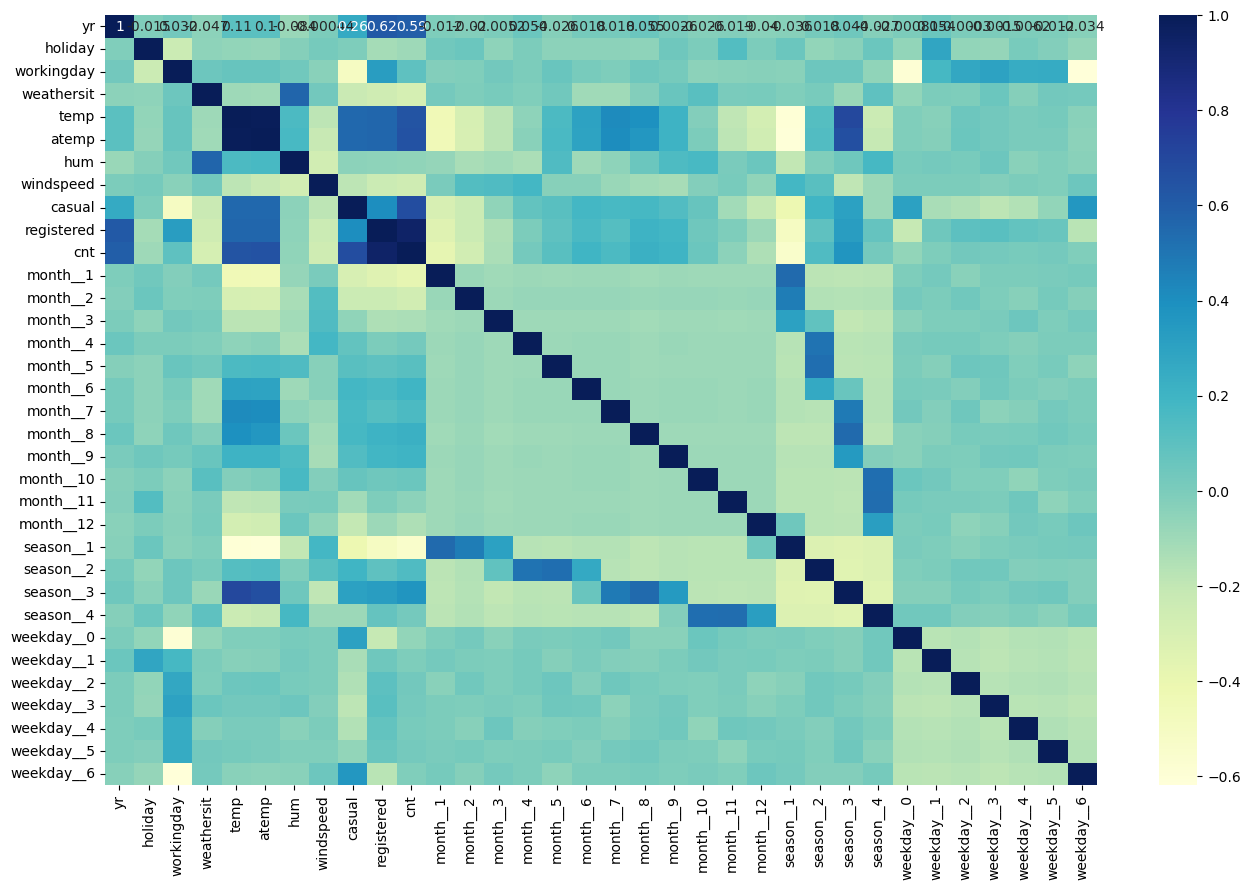

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(dataTrain.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Building the Model

In [33]:
y_train = dataTrain.pop('cnt')
x_train = dataTrain

In [34]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'month__1', 'month__2', 'month__3',
       'month__4', 'month__5', 'month__6', 'month__7', 'month__8', 'month__9',
       'month__10', 'month__11', 'month__12', 'season__1', 'season__2',
       'season__3', 'season__4', 'weekday__0', 'weekday__1', 'weekday__2',
       'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

In [35]:
# Assign all the feature variables to X
x_train_ds = x_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'month__1', 'month__2', 'month__3',
       'month__4', 'month__5', 'month__6', 'month__7', 'month__8', 'month__9',
       'month__10', 'month__11', 'month__12', 'season__1', 'season__2',
       'season__3', 'season__4', 'weekday__0', 'weekday__1', 'weekday__2',
       'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6']]

In [36]:
x_train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   month__1    510 non-null    int64  
 8   month__2    510 non-null    int64  
 9   month__3    510 non-null    int64  
 10  month__4    510 non-null    int64  
 11  month__5    510 non-null    int64  
 12  month__6    510 non-null    int64  
 13  month__7    510 non-null    int64  
 14  month__8    510 non-null    int64  
 15  month__9    510 non-null    int64  
 16  month__10   510 non-null    int64  
 17  month__11   510 non-null    int64  
 18  month__12   510 non-null    int64  
 19  season__1   510 non-null    int6

In [37]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_ds)

In [38]:
lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const         0.245018
yr            0.231190
holiday       0.003803
workingday    0.078168
temp          0.377902
atemp         0.153386
hum          -0.349217
windspeed    -0.231420
month__1     -0.025266
month__2     -0.005328
month__3      0.023244
month__4      0.021000
month__5      0.053972
month__6      0.022445
month__7     -0.018141
month__8      0.047440
month__9      0.110708
month__10     0.023764
month__11    -0.006471
month__12    -0.002349
season__1    -0.001464
season__2     0.078649
season__3     0.025193
season__4     0.142640
weekday__0    0.060698
weekday__1    0.008468
weekday__2    0.013139
weekday__3    0.016423
weekday__4    0.015000
weekday__5    0.028941
weekday__6    0.102350
dtype: float64

In [39]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     85.74
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.15e-162
Time:                        09:04:51   Log-Likelihood:                 478.91
No. Observations:                 510   AIC:                            -903.8
Df Residuals:                     483   BIC:                            -789.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.021     11.547      0.000       0.203       0.287
yr             0.2312      0.009     26.160      0.000       0.214       0.249
holiday        0.0038      0.022      0.173      0.862      -0.039       0.047
workingday     0.0782      0.010      7.853      0.000       0.059       0.098
temp           0.3779      0.156      2.429      0.016       0.072       0.684
atemp          0.1534      0.151      1.013      0.311      -0.144       0.451
hum           -0.3492      0.033    -10.459      0.000      -0.415      -0.284
windspeed     -0.2314      0.028     -8.141      0.000      -0.287      -0.176
month__1      -0.0253      0.026     -0.965      0.335      -0.077       0.026
month__2      -0.0053      0.026     -0.209      0.835      -0.055       0.045
month__3       0.0232      0.018      1.261      0.208      -0.013       0.059
month__4       0.0210      0.023      0.913      0.362      -0.024       0.066
month__5       0.0540      0.024      2.251      0.025       0.007       0.101
month__6       0.0224      0.023      0.965      0.335      -0.023       0.068
month__7      -0.0181      0.028     -0.643      0.520      -0.074       0.037
month__8       0.0474      0.026      1.818      0.070      -0.004       0.099
month__9       0.1107      0.021      5.152      0.000       0.068       0.153
month__10      0.0238      0.024      0.977      0.329      -0.024       0.072
month__11     -0.0065      0.025     -0.259      0.796      -0.056       0.043
month__12     -0.0023      0.022     -0.108      0.914      -0.045       0.040
season__1     -0.0015      0.018     -0.082      0.935      -0.037       0.034
season__2      0.0786      0.018      4.336      0.000       0.043       0.114
season__3      0.0252      0.020      1.236      0.217      -0.015       0.065
season__4      0.1426      0.020      7.170      0.000       0.104       0.182
weekday__0     0.0607      0.012      5.091      0.000       0.037       0.084
weekday__1     0.0085      0.010      0.821      0.412      -0.012       0.029
weekday__2     0.0131      0.011      1.144      0.253      -0.009       0.036
weekday__3     0.0164      0.011      1.528      0.127      -0.005       0.038
weekday__4     0.0150      0.011      1.337      0.182      -0.007       0.037
weekday__5     0.0289      0.011      2.530      0.012       0.006       0.051
weekday__6     0.1023      0.012      8.831      0.000       0.080       0.125
==============================================================================
Omnibus:                      110.737   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.606
Skew:                          -1.053   Prob(JB):                     7.17e-67
Kurtosis:                       6.146   Cond. No.                     1.19e+16
==

### Checking VIF

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,month__9,inf
1,holiday,inf
28,weekday__5,inf
27,weekday__4,inf
26,weekday__3,inf
25,weekday__2,inf
24,weekday__1,inf
23,weekday__0,inf
22,season__4,inf
21,season__3,inf


#### lets drop variables 'season_1' as it has a high P value of 0.935

In [42]:
x_train_ds.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'month__1', 'month__2', 'month__3', 'month__4', 'month__5', 'month__6',
       'month__7', 'month__8', 'month__9', 'month__10', 'month__11',
       'month__12', 'season__1', 'season__2', 'season__3', 'season__4',
       'weekday__0', 'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4',
       'weekday__5', 'weekday__6'],
      dtype='object')

In [43]:
x_train_ds.drop(["season__1"], axis=1, inplace=True)

In [44]:
x_train_lm = sm.add_constant(x_train_ds)

In [45]:
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     85.74
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.15e-162
Time:                        09:04:51   Log-Likelihood:                 478.91
No. Observations:                 510   AIC:                            -903.8
Df Residuals:                     483   BIC:                            -789.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2440      0.027      8.884      0.000       0.190       0.298
yr             0.2312      0.009     26.160      0.000       0.214       0.249
holiday        0.0036      0.022      0.161      0.872      -0.040       0.047
workingday     0.0779      0.011      7.345      0.000       0.057       0.099
temp           0.3779      0.156      2.429      0.016       0.072       0.684
atemp          0.1534      0.151      1.013      0.311      -0.144       0.451
hum           -0.3492      0.033    -10.459      0.000      -0.415      -0.284
windspeed     -0.2314      0.028     -8.141      0.000      -0.287      -0.176
month__1      -0.0254      0.025     -0.997      0.319      -0.075       0.025
month__2      -0.0054      0.025     -0.219      0.827      -0.054       0.043
month__3       0.0232      0.018      1.297      0.195      -0.012       0.058
month__4       0.0209      0.023      0.904      0.366      -0.025       0.066
month__5       0.0539      0.024      2.232      0.026       0.006       0.101
month__6       0.0224      0.024      0.948      0.343      -0.024       0.069
month__7      -0.0182      0.029     -0.635      0.526      -0.075       0.038
month__8       0.0474      0.027      1.778      0.076      -0.005       0.100
month__9       0.1106      0.022      5.020      0.000       0.067       0.154
month__10      0.0237      0.025      0.965      0.335      -0.025       0.072
month__11     -0.0066      0.025     -0.260      0.795      -0.056       0.043
month__12     -0.0024      0.022     -0.113      0.910      -0.045       0.040
season__2      0.0801      0.026      3.093      0.002       0.029       0.131
season__3      0.0267      0.033      0.811      0.418      -0.038       0.091
season__4      0.1441      0.028      5.059      0.000       0.088       0.200
weekday__0     0.0604      0.013      4.669      0.000       0.035       0.086
weekday__1     0.0084      0.010      0.802      0.423      -0.012       0.029
weekday__2     0.0131      0.012      1.126      0.261      -0.010       0.036
weekday__3     0.0163      0.011      1.508      0.132      -0.005       0.038
weekday__4     0.0149      0.011      1.318      0.188      -0.007       0.037
weekday__5     0.0289      0.012      2.506      0.013       0.006       0.051
weekday__6     0.1020      0.013      8.092      0.000       0.077       0.127
==============================================================================
Omnibus:                      110.737   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.606
Skew:                          -1.053   Prob(JB):                     7.17e-67
Kurtosis:                       6.146   Cond. No.                     1.18e+16
==============================================================================

N

In [46]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,month__8,inf
13,month__7,inf
27,weekday__5,inf
26,weekday__4,inf
25,weekday__3,inf
24,weekday__2,inf
23,weekday__1,inf
22,weekday__0,inf
18,month__12,inf
17,month__11,inf


#### lets drop variable 'month__12' as it has a high P value of 0.9+

In [47]:
x_train_ds.drop(["month__12"], axis=1, inplace=True)

In [48]:
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     85.74
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.15e-162
Time:                        09:04:51   Log-Likelihood:                 478.91
No. Observations:                 510   AIC:                            -903.8
Df Residuals:                     483   BIC:                            -789.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2421      0.029      8.283      0.000       0.185       0.299
yr             0.2312      0.009     26.160      0.000       0.214       0.249
holiday        0.0032      0.022      0.144      0.886      -0.040       0.047
workingday     0.0776      0.011      7.083      0.000       0.056       0.099
temp           0.3779      0.156      2.429      0.016       0.072       0.684
atemp          0.1534      0.151      1.013      0.311      -0.144       0.451
hum           -0.3492      0.033    -10.459      0.000      -0.415      -0.284
windspeed     -0.2314      0.028     -8.141      0.000      -0.287      -0.176
month__1      -0.0229      0.029     -0.788      0.431      -0.080       0.034
month__2      -0.0030      0.030     -0.100      0.921      -0.062       0.056
month__3       0.0256      0.029      0.893      0.372      -0.031       0.082
month__4       0.0233      0.037      0.634      0.526      -0.049       0.096
month__5       0.0563      0.039      1.449      0.148      -0.020       0.133
month__6       0.0248      0.040      0.624      0.533      -0.053       0.103
month__7      -0.0158      0.043     -0.369      0.712      -0.100       0.068
month__8       0.0498      0.041      1.226      0.221      -0.030       0.130
month__9       0.1131      0.034      3.316      0.001       0.046       0.180
month__10      0.0261      0.024      1.070      0.285      -0.022       0.074
month__11     -0.0041      0.023     -0.179      0.858      -0.049       0.041
season__2      0.0801      0.026      3.093      0.002       0.029       0.131
season__3      0.0267      0.033      0.811      0.418      -0.038       0.091
season__4      0.1441      0.028      5.059      0.000       0.088       0.200
weekday__0     0.0598      0.013      4.441      0.000       0.033       0.086
weekday__1     0.0082      0.010      0.783      0.434      -0.012       0.029
weekday__2     0.0129      0.012      1.106      0.269      -0.010       0.036
weekday__3     0.0162      0.011      1.489      0.137      -0.005       0.038
weekday__4     0.0148      0.011      1.313      0.190      -0.007       0.037
weekday__5     0.0287      0.012      2.494      0.013       0.006       0.051
weekday__6     0.1015      0.013      7.783      0.000       0.076       0.127
==============================================================================
Omnibus:                      110.737   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.606
Skew:                          -1.053   Prob(JB):                     7.17e-67
Kurtosis:                       6.146   Cond. No.                     3.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [49]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
26,weekday__5,inf
25,weekday__4,inf
24,weekday__3,inf
23,weekday__2,inf
22,weekday__1,inf
3,temp,66.51
4,atemp,55.68
27,weekday__6,12.38


#### lets drop variable 'month__11' as it has a high P value 


In [50]:
x_train_ds.drop(["month__11"], axis=1, inplace=True)

In [51]:
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     89.35
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.22e-163
Time:                        09:04:51   Log-Likelihood:                 478.89
No. Observations:                 510   AIC:                            -905.8
Df Residuals:                     484   BIC:                            -795.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2419      0.029      8.291      0.000       0.185       0.299
yr             0.2312      0.009     26.195      0.000       0.214       0.249
holiday        0.0027      0.022      0.125      0.901      -0.040       0.046
workingday     0.0777      0.011      7.116      0.000       0.056       0.099
temp           0.3767      0.155      2.426      0.016       0.072       0.682
atemp          0.1536      0.151      1.016      0.310      -0.144       0.451
hum           -0.3489      0.033    -10.474      0.000      -0.414      -0.283
windspeed     -0.2318      0.028     -8.193      0.000      -0.287      -0.176
month__1      -0.0226      0.029     -0.780      0.436      -0.080       0.034
month__2      -0.0026      0.030     -0.086      0.932      -0.061       0.056
month__3       0.0263      0.028      0.926      0.355      -0.029       0.082
month__4       0.0245      0.036      0.676      0.500      -0.047       0.096
month__5       0.0575      0.038      1.503      0.133      -0.018       0.133
month__6       0.0263      0.039      0.679      0.497      -0.050       0.102
month__7      -0.0139      0.041     -0.335      0.738      -0.095       0.067
month__8       0.0516      0.039      1.316      0.189      -0.025       0.129
month__9       0.1150      0.032      3.563      0.000       0.052       0.178
month__10      0.0286      0.020      1.426      0.155      -0.011       0.068
season__2      0.0796      0.026      3.096      0.002       0.029       0.130
season__3      0.0256      0.032      0.793      0.428      -0.038       0.089
season__4      0.1422      0.026      5.405      0.000       0.090       0.194
weekday__0     0.0598      0.013      4.446      0.000       0.033       0.086
weekday__1     0.0082      0.010      0.786      0.432      -0.012       0.029
weekday__2     0.0128      0.012      1.098      0.273      -0.010       0.036
weekday__3     0.0160      0.011      1.482      0.139      -0.005       0.037
weekday__4     0.0147      0.011      1.308      0.192      -0.007       0.037
weekday__5     0.0287      0.011      2.498      0.013       0.006       0.051
weekday__6     0.1016      0.013      7.808      0.000       0.076       0.127
==============================================================================
Omnibus:                      110.994   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.724
Skew:                          -1.055   Prob(JB):                     4.10e-67
Kurtosis:                       6.152   Cond. No.                     3.49e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-28. This might indicate

In [52]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
25,weekday__5,inf
24,weekday__4,inf
23,weekday__3,inf
22,weekday__2,inf
21,weekday__1,inf
1,holiday,inf
3,temp,66.39
4,atemp,55.68
26,weekday__6,12.38


#### dropping variable "month__2"  as it has high P value

In [53]:
x_train_ds.drop(["month__2"], axis=1, inplace=True)

In [54]:
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     93.26
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.25e-164
Time:                        09:04:52   Log-Likelihood:                 478.89
No. Observations:                 510   AIC:                            -907.8
Df Residuals:                     485   BIC:                            -801.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2404      0.024     10.106      0.000       0.194       0.287
yr             0.2312      0.009     26.232      0.000       0.214       0.249
holiday        0.0025      0.022      0.114      0.909      -0.040       0.045
workingday     0.0773      0.010      7.590      0.000       0.057       0.097
temp           0.3767      0.155      2.428      0.016       0.072       0.682
atemp          0.1538      0.151      1.018      0.309      -0.143       0.451
hum           -0.3487      0.033    -10.498      0.000      -0.414      -0.283
windspeed     -0.2318      0.028     -8.201      0.000      -0.287      -0.176
month__1      -0.0209      0.021     -1.016      0.310      -0.061       0.019
month__3       0.0279      0.022      1.290      0.198      -0.015       0.070
month__4       0.0258      0.033      0.786      0.432      -0.039       0.090
month__5       0.0588      0.035      1.667      0.096      -0.011       0.128
month__6       0.0274      0.037      0.747      0.455      -0.045       0.099
month__7      -0.0132      0.040     -0.325      0.745      -0.093       0.066
month__8       0.0524      0.038      1.367      0.172      -0.023       0.128
month__9       0.1156      0.032      3.659      0.000       0.054       0.178
month__10      0.0286      0.020      1.430      0.153      -0.011       0.068
season__2      0.0800      0.025      3.170      0.002       0.030       0.130
season__3      0.0265      0.030      0.875      0.382      -0.033       0.086
season__4      0.1438      0.018      8.035      0.000       0.109       0.179
weekday__0     0.0594      0.012      4.791      0.000       0.035       0.084
weekday__1     0.0081      0.010      0.783      0.434      -0.012       0.028
weekday__2     0.0126      0.011      1.101      0.271      -0.010       0.035
weekday__3     0.0159      0.011      1.484      0.138      -0.005       0.037
weekday__4     0.0146      0.011      1.306      0.192      -0.007       0.037
weekday__5     0.0286      0.011      2.507      0.012       0.006       0.051
weekday__6     0.1012      0.012      8.341      0.000       0.077       0.125
==============================================================================
Omnibus:                      110.869   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.217
Skew:                          -1.054   Prob(JB):                     5.28e-67
Kurtosis:                       6.150   Cond. No.                     3.44e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [55]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
24,weekday__5,inf
23,weekday__4,inf
22,weekday__3,inf
21,weekday__2,inf
20,weekday__1,inf
3,temp,66.39
4,atemp,55.67
17,season__3,9.65


In [56]:
#### dropping variable "holiday"  as it has high P value

In [57]:
x_train_ds.drop(["holiday"], axis=1, inplace=True)
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     93.26
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.25e-164
Time:                        09:04:52   Log-Likelihood:                 478.89
No. Observations:                 510   AIC:                            -907.8
Df Residuals:                     485   BIC:                            -801.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2420      0.031      7.743      0.000       0.181       0.303
yr             0.2312      0.009     26.232      0.000       0.214       0.249
workingday     0.0749      0.029      2.578      0.010       0.018       0.132
temp           0.3767      0.155      2.428      0.016       0.072       0.682
atemp          0.1538      0.151      1.018      0.309      -0.143       0.451
hum           -0.3487      0.033    -10.498      0.000      -0.414      -0.283
windspeed     -0.2318      0.028     -8.201      0.000      -0.287      -0.176
month__1      -0.0209      0.021     -1.016      0.310      -0.061       0.019
month__3       0.0279      0.022      1.290      0.198      -0.015       0.070
month__4       0.0258      0.033      0.786      0.432      -0.039       0.090
month__5       0.0588      0.035      1.667      0.096      -0.011       0.128
month__6       0.0274      0.037      0.747      0.455      -0.045       0.099
month__7      -0.0132      0.040     -0.325      0.745      -0.093       0.066
month__8       0.0524      0.038      1.367      0.172      -0.023       0.128
month__9       0.1156      0.032      3.659      0.000       0.054       0.178
month__10      0.0286      0.020      1.430      0.153      -0.011       0.068
season__2      0.0800      0.025      3.170      0.002       0.030       0.130
season__3      0.0265      0.030      0.875      0.382      -0.033       0.086
season__4      0.1438      0.018      8.035      0.000       0.109       0.179
weekday__0     0.0578      0.021      2.763      0.006       0.017       0.099
weekday__1     0.0090      0.013      0.672      0.502      -0.017       0.035
weekday__2     0.0135      0.016      0.832      0.406      -0.018       0.045
weekday__3     0.0169      0.016      1.071      0.285      -0.014       0.048
weekday__4     0.0155      0.016      0.990      0.323      -0.015       0.046
weekday__5     0.0295      0.016      1.845      0.066      -0.002       0.061
weekday__6     0.0996      0.021      4.803      0.000       0.059       0.140
==============================================================================
Omnibus:                      110.869   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.217
Skew:                          -1.054   Prob(JB):                     5.28e-67
Kurtosis:                       6.150   Cond. No.                     8.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
#### dropping variable "weekday__4"  as it has high P value

In [59]:
x_train_ds.drop(["weekday__4"], axis=1, inplace=True)
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     93.26
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.25e-164
Time:                        09:04:52   Log-Likelihood:                 478.89
No. Observations:                 510   AIC:                            -907.8
Df Residuals:                     485   BIC:                            -801.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2575      0.042      6.117      0.000       0.175       0.340
yr             0.2312      0.009     26.232      0.000       0.214       0.249
workingday     0.0749      0.029      2.578      0.010       0.018       0.132
temp           0.3767      0.155      2.428      0.016       0.072       0.682
atemp          0.1538      0.151      1.018      0.309      -0.143       0.451
hum           -0.3487      0.033    -10.498      0.000      -0.414      -0.283
windspeed     -0.2318      0.028     -8.201      0.000      -0.287      -0.176
month__1      -0.0209      0.021     -1.016      0.310      -0.061       0.019
month__3       0.0279      0.022      1.290      0.198      -0.015       0.070
month__4       0.0258      0.033      0.786      0.432      -0.039       0.090
month__5       0.0588      0.035      1.667      0.096      -0.011       0.128
month__6       0.0274      0.037      0.747      0.455      -0.045       0.099
month__7      -0.0132      0.040     -0.325      0.745      -0.093       0.066
month__8       0.0524      0.038      1.367      0.172      -0.023       0.128
month__9       0.1156      0.032      3.659      0.000       0.054       0.178
month__10      0.0286      0.020      1.430      0.153      -0.011       0.068
season__2      0.0800      0.025      3.170      0.002       0.030       0.130
season__3      0.0265      0.030      0.875      0.382      -0.033       0.086
season__4      0.1438      0.018      8.035      0.000       0.109       0.179
weekday__0     0.0423      0.033      1.292      0.197      -0.022       0.107
weekday__1    -0.0065      0.017     -0.393      0.695      -0.039       0.026
weekday__2    -0.0020      0.017     -0.119      0.905      -0.035       0.031
weekday__3     0.0013      0.016      0.083      0.934      -0.030       0.033
weekday__5     0.0140      0.017      0.824      0.410      -0.019       0.047
weekday__6     0.0841      0.033      2.581      0.010       0.020       0.148
==============================================================================
Omnibus:                      110.869   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.217
Skew:                          -1.054   Prob(JB):                     5.28e-67
Kurtosis:                       6.150   Cond. No.                         90.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,439.46
3,atemp,381.17
4,hum,21.73
1,workingday,18.13
16,season__3,13.05
15,season__2,8.52
12,month__8,7.44
11,month__7,6.62
9,month__5,5.63
10,month__6,5.49


In [61]:
x_train_ds.drop(["weekday__3"], axis=1, inplace=True)
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     97.51
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.26e-165
Time:                        09:04:52   Log-Likelihood:                 478.88
No. Observations:                 510   AIC:                            -909.8
Df Residuals:                     486   BIC:                            -808.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2581      0.042      6.216      0.000       0.176       0.340
yr             0.2312      0.009     26.260      0.000       0.214       0.249
workingday     0.0750      0.029      2.588      0.010       0.018       0.132
temp           0.3771      0.155      2.434      0.015       0.073       0.681
atemp          0.1534      0.151      1.017      0.310      -0.143       0.450
hum           -0.3486      0.033    -10.519      0.000      -0.414      -0.283
windspeed     -0.2319      0.028     -8.210      0.000      -0.287      -0.176
month__1      -0.0209      0.021     -1.018      0.309      -0.061       0.019
month__3       0.0278      0.022      1.291      0.197      -0.015       0.070
month__4       0.0259      0.033      0.790      0.430      -0.039       0.090
month__5       0.0589      0.035      1.671      0.095      -0.010       0.128
month__6       0.0275      0.037      0.752      0.453      -0.044       0.099
month__7      -0.0130      0.040     -0.322      0.747      -0.092       0.066
month__8       0.0525      0.038      1.372      0.171      -0.023       0.128
month__9       0.1157      0.032      3.668      0.000       0.054       0.178
month__10      0.0287      0.020      1.436      0.152      -0.011       0.068
season__2      0.0799      0.025      3.172      0.002       0.030       0.129
season__3      0.0264      0.030      0.873      0.383      -0.033       0.086
season__4      0.1438      0.018      8.044      0.000       0.109       0.179
weekday__0     0.0417      0.032      1.308      0.191      -0.021       0.104
weekday__1    -0.0072      0.014     -0.511      0.609      -0.035       0.021
weekday__2    -0.0027      0.014     -0.191      0.849      -0.031       0.025
weekday__5     0.0133      0.015      0.914      0.361      -0.015       0.042
weekday__6     0.0835      0.032      2.634      0.009       0.021       0.146
==============================================================================
Omnibus:                      111.027   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.168
Skew:                          -1.055   Prob(JB):                     3.28e-67
Kurtosis:                       6.156   Cond. No.                         90.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,438.68
3,atemp,380.78
4,hum,21.34
1,workingday,17.43
16,season__3,13.03
15,season__2,8.52
12,month__8,7.44
11,month__7,6.61
9,month__5,5.63
10,month__6,5.49


In [63]:
#### dropping variable "temp"  as it has high VIF value

In [64]:
x_train_ds.drop(["temp"], axis=1, inplace=True)
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.29e-165
Time:                        09:04:52   Log-Likelihood:                 475.79
No. Observations:                 510   AIC:                            -905.6
Df Residuals:                     487   BIC:                            -808.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2677      0.042      6.446      0.000       0.186       0.349
yr             0.2329      0.009     26.402      0.000       0.216       0.250
workingday     0.0686      0.029      2.367      0.018       0.012       0.126
atemp          0.5015      0.048     10.430      0.000       0.407       0.596
hum           -0.3450      0.033    -10.368      0.000      -0.410      -0.280
windspeed     -0.2168      0.028     -7.829      0.000      -0.271      -0.162
month__1      -0.0233      0.021     -1.133      0.258      -0.064       0.017
month__3       0.0336      0.022      1.561      0.119      -0.009       0.076
month__4       0.0333      0.033      1.014      0.311      -0.031       0.098
month__5       0.0766      0.035      2.211      0.027       0.009       0.145
month__6       0.0524      0.035      1.483      0.139      -0.017       0.122
month__7       0.0114      0.039      0.289      0.773      -0.066       0.089
month__8       0.0783      0.037      2.120      0.035       0.006       0.151
month__9       0.1312      0.031      4.225      0.000       0.070       0.192
month__10      0.0355      0.020      1.784      0.075      -0.004       0.075
season__2      0.0792      0.025      3.127      0.002       0.029       0.129
season__3      0.0335      0.030      1.105      0.270      -0.026       0.093
season__4      0.1459      0.018      8.131      0.000       0.111       0.181
weekday__0     0.0348      0.032      1.090      0.276      -0.028       0.097
weekday__1    -0.0092      0.014     -0.651      0.515      -0.037       0.019
weekday__2    -0.0030      0.014     -0.212      0.833      -0.031       0.025
weekday__5     0.0156      0.015      1.070      0.285      -0.013       0.044
weekday__6     0.0766      0.032      2.414      0.016       0.014       0.139
==============================================================================
Omnibus:                      110.058   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.090
Skew:                          -1.008   Prob(JB):                     6.34e-74
Kurtosis:                       6.435   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,34.76
3,hum,21.13
1,workingday,17.40
15,season__3,12.89
14,season__2,8.52
11,month__8,6.91
10,month__7,6.24
8,month__5,5.40
9,month__6,5.09
21,weekday__6,4.84


In [66]:
#### dropping variable "atemp"  as it has high VIF value

In [67]:
x_train_ds.drop(["atemp"], axis=1, inplace=True)
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     82.13
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.17e-145
Time:                        09:04:52   Log-Likelihood:                 424.38
No. Observations:                 510   AIC:                            -804.8
Df Residuals:                     488   BIC:                            -711.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3996      0.044      9.141      0.000       0.314       0.486
yr             0.2464      0.010     25.554      0.000       0.227       0.265
workingday     0.0480      0.032      1.501      0.134      -0.015       0.111
hum           -0.2826      0.036     -7.816      0.000      -0.354      -0.212
windspeed     -0.2381      0.031     -7.802      0.000      -0.298      -0.178
month__1      -0.0662      0.022     -2.968      0.003      -0.110      -0.022
month__3       0.0899      0.023      3.903      0.000       0.045       0.135
month__4       0.1326      0.035      3.824      0.000       0.064       0.201
month__5       0.2378      0.034      6.944      0.000       0.170       0.305
month__6       0.2560      0.033      7.873      0.000       0.192       0.320
month__7       0.2259      0.037      6.093      0.000       0.153       0.299
month__8       0.2553      0.036      7.046      0.000       0.184       0.327
month__9       0.2640      0.031      8.440      0.000       0.203       0.325
month__10      0.1055      0.021      5.099      0.000       0.065       0.146
season__2      0.0795      0.028      2.841      0.005       0.025       0.135
season__3      0.0795      0.033      2.403      0.017       0.014       0.145
season__4      0.1790      0.020      9.178      0.000       0.141       0.217
weekday__0     0.0083      0.035      0.236      0.814      -0.061       0.077
weekday__1    -0.0158      0.016     -1.014      0.311      -0.047       0.015
weekday__2    -0.0031      0.016     -0.195      0.845      -0.034       0.028
weekday__5     0.0073      0.016      0.452      0.651      -0.024       0.039
weekday__6     0.0487      0.035      1.395      0.164      -0.020       0.117
==============================================================================
Omnibus:                       89.260   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.857
Skew:                          -0.825   Prob(JB):                     1.13e-58
Kurtosis:                       6.136   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,18.23
1,workingday,16.82
14,season__3,12.50
13,season__2,8.52
10,month__8,5.55
20,weekday__6,4.72
9,month__7,4.62
3,windspeed,4.59
16,weekday__0,4.46
7,month__5,4.33


In [69]:
#### dropping variable "atemp"  as it has high VIF value
x_train_ds.drop(["workingday"], axis=1, inplace=True)
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     85.91
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.02e-145
Time:                        09:04:52   Log-Likelihood:                 423.20
No. Observations:                 510   AIC:                            -804.4
Df Residuals:                     489   BIC:                            -715.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4435      0.033     13.631      0.000       0.380       0.507
yr             0.2468      0.010     25.569      0.000       0.228       0.266
hum           -0.2805      0.036     -7.752      0.000      -0.352      -0.209
windspeed     -0.2383      0.031     -7.801      0.000      -0.298      -0.178
month__1      -0.0649      0.022     -2.909      0.004      -0.109      -0.021
month__3       0.0933      0.023      4.065      0.000       0.048       0.138
month__4       0.1352      0.035      3.900      0.000       0.067       0.203
month__5       0.2410      0.034      7.044      0.000       0.174       0.308
month__6       0.2599      0.032      8.007      0.000       0.196       0.324
month__7       0.2298      0.037      6.208      0.000       0.157       0.303
month__8       0.2592      0.036      7.163      0.000       0.188       0.330
month__9       0.2652      0.031      8.472      0.000       0.204       0.327
month__10      0.1068      0.021      5.159      0.000       0.066       0.148
season__2      0.0791      0.028      2.823      0.005       0.024       0.134
season__3      0.0786      0.033      2.371      0.018       0.013       0.144
season__4      0.1798      0.020      9.208      0.000       0.141       0.218
weekday__0    -0.0391      0.016     -2.518      0.012      -0.070      -0.009
weekday__1    -0.0214      0.015     -1.409      0.159      -0.051       0.008
weekday__2    -0.0026      0.016     -0.161      0.872      -0.034       0.029
weekday__5     0.0071      0.016      0.444      0.657      -0.024       0.039
weekday__6     0.0014      0.015      0.093      0.926      -0.028       0.031
==============================================================================
Omnibus:                       93.217   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.773
Skew:                          -0.860   Prob(JB):                     1.77e-61
Kurtosis:                       6.195   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,season__3,12.43
1,hum,10.87
12,season__2,8.52
9,month__8,5.50
8,month__7,4.56
6,month__5,4.24
5,month__4,3.99
2,windspeed,3.96
14,season__4,3.64
10,month__9,3.46


In [71]:
#### dropping variable "atemp"  as it has high VIF value
x_train_ds.drop(["weekday__6"], axis=1, inplace=True)
x_train_lm = sm.add_constant(x_train_ds)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     90.61
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.07e-146
Time:                        09:04:52   Log-Likelihood:                 423.20
No. Observations:                 510   AIC:                            -806.4
Df Residuals:                     490   BIC:                            -721.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4440      0.032     13.861      0.000       0.381       0.507
yr             0.2467      0.010     25.602      0.000       0.228       0.266
hum           -0.2806      0.036     -7.764      0.000      -0.352      -0.210
windspeed     -0.2382      0.031     -7.811      0.000      -0.298      -0.178
month__1      -0.0649      0.022     -2.911      0.004      -0.109      -0.021
month__3       0.0933      0.023      4.069      0.000       0.048       0.138
month__4       0.1352      0.035      3.905      0.000       0.067       0.203
month__5       0.2410      0.034      7.051      0.000       0.174       0.308
month__6       0.2599      0.032      8.018      0.000       0.196       0.324
month__7       0.2301      0.037      6.232      0.000       0.158       0.303
month__8       0.2594      0.036      7.185      0.000       0.188       0.330
month__9       0.2653      0.031      8.488      0.000       0.204       0.327
month__10      0.1069      0.021      5.169      0.000       0.066       0.148
season__2      0.0791      0.028      2.826      0.005       0.024       0.134
season__3      0.0784      0.033      2.372      0.018       0.013       0.143
season__4      0.1798      0.020      9.217      0.000       0.141       0.218
weekday__0    -0.0396      0.015     -2.714      0.007      -0.068      -0.011
weekday__1    -0.0219      0.014     -1.536      0.125      -0.050       0.006
weekday__2    -0.0031      0.015     -0.203      0.839      -0.033       0.026
weekday__5     0.0067      0.015      0.438      0.661      -0.023       0.036
==============================================================================
Omnibus:                       93.128   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.306
Skew:                          -0.858   Prob(JB):                     1.36e-61
Kurtosis:                       6.201   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
vif = pd.DataFrame()
vif['Features'] = x_train_ds.columns
vif['VIF'] = [variance_inflation_factor(x_train_ds.values, i) for i in range(x_train_ds.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,season__3,12.42
1,hum,10.58
12,season__2,8.52
9,month__8,5.47
8,month__7,4.53
6,month__5,4.24
5,month__4,3.99
2,windspeed,3.88
14,season__4,3.63
10,month__9,3.45


In [73]:
x_train_ds.columns

Index(['yr', 'hum', 'windspeed', 'month__1', 'month__3', 'month__4',
       'month__5', 'month__6', 'month__7', 'month__8', 'month__9', 'month__10',
       'season__2', 'season__3', 'season__4', 'weekday__0', 'weekday__1',
       'weekday__2', 'weekday__5'],
      dtype='object')

### Residual Analysis of the train data

In [74]:
y_train_pred = lr.predict(x_train_lm)

Text(0.5, 0, 'Errors')

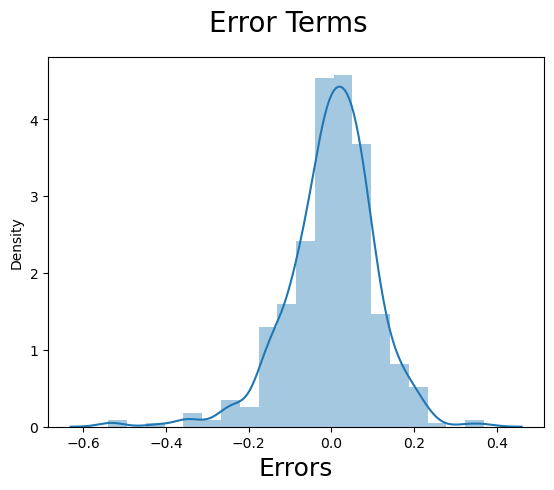

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions Using the Final Model

In [76]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', "cnt"]

dataTest[num_vars] = scaler.transform(dataTest[num_vars])

In [77]:
dataTest.describe()

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,season__2,season__3,season__4,weekday__0,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,358.127273,0.481818,0.036364,0.700000,1.372727,0.558718,0.532847,0.638221,0.313293,0.266436,...,0.263636,0.245455,0.236364,0.145455,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,214.116582,0.500809,0.187620,0.459303,0.538204,0.233187,0.217401,0.148694,0.159584,0.216751,...,0.441609,0.431338,0.425817,0.353363,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,4.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.500000,0.000000,0.000000,0.000000,1.000000,0.355429,0.344870,0.529197,0.198843,0.102484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.500000,0.000000,0.000000,1.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.750000,1.000000,0.000000,1.000000,2.000000,0.755981,0.713308,0.743798,0.402718,0.361780,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474,1.038708,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test = dataTest.pop('cnt')
x_test = dataTest

In [79]:
x_test_ds = x_test[['yr', 'hum', 'windspeed', 'month__1', 'month__3', 'month__4',
       'month__5', 'month__6', 'month__7', 'month__8', 'month__9', 'month__10',
       'season__2', 'season__3', 'season__4', 'weekday__0', 'weekday__1',
       'weekday__2', 'weekday__5']]



In [80]:
x_test_ds

,yr,hum,windspeed,month__1,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,season__2,season__3,season__4,weekday__0,weekday__1,weekday__2,weekday__5
184,0,0.657364,0.084219,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
535,1,0.610133,0.153728,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
299,0,0.837699,0.334206,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0.437098,0.339570,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
152,0,0.314298,0.537414,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0.756118,0.283397,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
127,0,0.650923,0.069510,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
640,1,0.817947,0.052115,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
72,0,0.512107,0.203418,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [81]:
# Adding constant variable to test dataframe
x_test_lm = sm.add_constant(x_test_ds)

In [82]:
### predict on test dataset
y_test_pred = lr.predict(x_test_lm)

## Model Evaluation

Text(0, 0.5, 'y_pred')

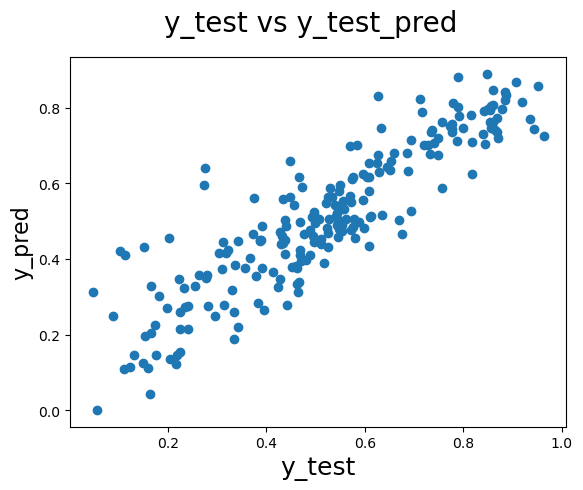

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

Text(0.5, 0, 'Errors')

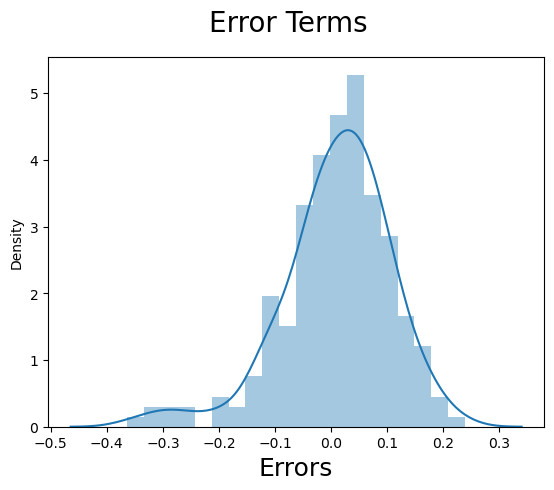

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Variables which are significant to predicting the demand for shared bikes


In [85]:
x_test_lm.columns

Index(['const', 'yr', 'hum', 'windspeed', 'month__1', 'month__3', 'month__4',
       'month__5', 'month__6', 'month__7', 'month__8', 'month__9', 'month__10',
       'season__2', 'season__3', 'season__4', 'weekday__0', 'weekday__1',
       'weekday__2', 'weekday__5'],
      dtype='object')

#### ['yr', 'hum', 'windspeed', 'month__1', 'month__3', 'month__4', 'month__5', 'month__6', 'month__7', 'month__8', 'month__9', 'month__10', 'season__2', 'season__3', 'season__4', 'weekday__0', 'weekday__1', 'weekday__2', 'weekday__5']

## R-squared score on the test set

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7956305192056048

## R-Squared value : 0.7956305192056048